## 3D Histogram (lipids)

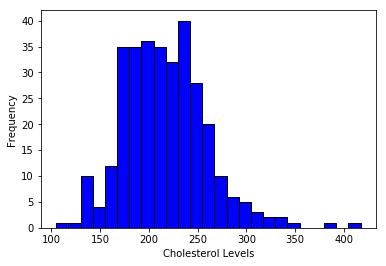

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('lipids.csv', skiprows=[0,1,2,3])
df.head()
df = df[df['diseased']==1]

plt.hist(df['chol'], bins=25, color='blue', edgecolor='black')
plt.xlabel("Cholesterol Levels")
plt.ylabel("Frequency")
plt.show()

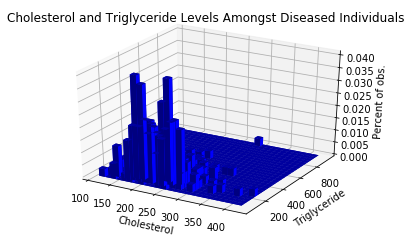

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
bin_num = int(25)
hist, xedges, yedges = np.histogram2d(df['chol'], df['trig'], bins=bin_num)
hist = hist / hist.sum()
x_midp = xedges[:-1] + 0.5 * (xedges[1] - xedges[0])
y_midp = yedges[:-1] + 0.5 * (yedges[1] - yedges[0])
elements = (len(xedges) - 1) * (len(yedges) - 1)
ypos, xpos = np.meshgrid(y_midp, x_midp)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)
dx = (xedges[1] - xedges[0]) * np.ones_like(bin_num)
dy = (yedges[1] - yedges[0]) * np.ones_like(bin_num)
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
ax.set_xlabel('Cholesterol')
ax.set_ylabel('Triglyceride')
ax.set_zlabel('Percent of obs.')
plt.title('Cholesterol and Triglyceride Levels Amongst Diseased Individuals')
plt.show()